In [3]:
import numpy as np
import pandas as pd
import shapefile as shp
from plotnine import *
import random

%matplotlib inline

In [4]:
def read_shapefile(sf):
    fields = [x[0] for x in sf.fields][1:]
    records = sf.records()
    df = pd.DataFrame(columns=fields, data=records)
    return df

def remove_last_word(content):
    return ' '.join(content.split(' ')[:-1])

In [5]:
# Read the file
file_path = "./trends.shp"
sf = shp.Reader(file_path)
df = read_shapefile(sf)
df.head()

,id,county,trend,p,z,slope,intercept
0,6037500403,Los Angeles County,no trend,0.152406,-1.431084,-66.375000,4575.187500
1,6065045103,Riverside County,decreasing,0.015322,-2.424672,-94.428571,4157.928571
2,6065046404,Riverside County,increasing,0.002358,3.041052,311.000000,4748.000000
3,6065045108,Riverside County,increasing,0.004208,2.862167,212.875000,5267.062500
4,6037122122,Los Angeles County,increasing,0.001282,3.219938,84.888889,1935.000000


In [13]:
inc_trend_df = df[(df["county"] == "Los Angeles County") & (df["trend"] == "increasing")]
inc_trend_df.head()

,id,county,trend,p,z,slope,intercept
4,6037122122,Los Angeles County,increasing,0.001282,3.219938,84.888889,1935.00
19,6037141400,Los Angeles County,increasing,0.031823,2.146625,54.000000,4441.00
29,6037920034,Los Angeles County,increasing,0.020045,2.325511,51.400000,3334.20
32,6037113231,Los Angeles County,increasing,0.007290,2.683282,29.000000,2082.00
34,6037300800,Los Angeles County,increasing,0.004208,2.862167,196.500000,6378.25


In [14]:
inc_trend_df["z"].mean()

2.654714226986206

Goals
- identify top 5 counties with most drastic increasing population trends
 -- make inc dataframe and dec dataframe and then sort to identify
 -- loop through all and sort? --> then identify top of each
- identify population trends in target wildfire counties re: Jia
- 

In [179]:

#for loop for inc, add county, mean z, count of tracts to dictionary


counties = (df).drop_duplicates(subset = ["county"])

counties = counties["county"]
counties.reset_index()
# for c in counties:
#     print(c) #a check to see if counties can be independently identified for future
    
#inc_trend_df = df[(df["county"] == "Los Angeles County") & (df["trend"] == "increasing")]
inc_dict = {}
dec_dict = {}
for c in counties:
    #Identifying increasing trends in county c 
    inc_temp_df = pd.DataFrame((df[(df["county"] == c) & (df["trend"] == "increasing")]))
    inc_mean_z = inc_temp_df["z"].mean()
    inc_dict[c] = {inc_mean_z}

    #Identifying decreasing trends in county c
    dec_temp_df = pd.DataFrame((df[(df["county"] == c) & (df["trend"] == "decreasing")]))
    dec_mean_z = dec_temp_df["z"].mean()
    dec_dict[c] = {dec_mean_z}
    


In [180]:
#create increasing trends df
cols = ["county", "mean z-score", "number of tracts"]
increasing_counties = pd.DataFrame()
#create decreasing trends df
decreasing_counties = pd.DataFrame()

increasing_counties=pd.DataFrame.from_dict(inc_dict, orient='index', columns={"mean z"})
increasing_counties

decreasing_counties=pd.DataFrame.from_dict(dec_dict, orient='index', columns={"mean z"})
decreasing_counties


sorted_inc = increasing_counties.sort_values("mean z", axis = 0, ascending=False)
sorted_inc

top_5_inc = sorted_inc[0:5]
top_5_inc

sorted_dec = decreasing_counties.sort_values("mean z", axis = 0, ascending=True)
sorted_dec

top_5_dec = sorted_dec[0:5]
top_5_dec


,mean z
Glenn County,-3.577709
Lassen County,-3.130495
San Francisco County,-3.130495
Modoc County,-3.041052
Tehama County,-3.041052


In [207]:
top_5_inc
increasing_counties

increasing_counties.to_csv("increasing_counties.csv")
decreasing_counties.to_csv("decreasing_counties.csv")

In [184]:
target_counties = {"Alpine County", "Butte County", "El Dorado County", "Calaveras County", "Mariposa County", "Nevada County", "Sierra County","Tuolumne County", "Yuba County", "Placer County", "Amador County", "Plumas County", "Sacramento County"}
bay_area = {"San Francisco County", "Santa Clara County", "Marin County", "San Mateo County", "Alameda County", "Contra Costa County", "Napa County", "Sonoma County", "Solano County", "San Benito County"}
so_cal = {"Ventura County", "Los Angeles County", "Orange County"}


In [208]:
df_soCal = pd.DataFrame(columns={"inc tracts mean z", "dec tracts mean z"})



In [173]:
# Initialize county df
county_list = df["county"].unique()
county_df = pd.DataFrame({"county": [ remove_last_word(county) for county in county_list ],
                          "increasing": np.zeros(len(county_list)),
                          "decreasing": np.zeros(len(county_list)),
                          "no trend": np.zeros(len(county_list))})
for index, row in df.iterrows():
    trend = row["trend"]
    county = remove_last_word(row["county"])
    county_df.loc[county_df["county"] == county, trend] += 1
    
totals = { remove_last_word(county): len(df[df["county"] == county]) for county in county_list }
county_df.head()

,county,increasing,decreasing,no trend
0,Los Angeles,153.0,76.0,305.0
1,Riverside,165.0,30.0,160.0
2,Santa Clara,57.0,10.0,71.0
3,Orange,52.0,21.0,82.0
4,San Diego,114.0,16.0,149.0


In [7]:
blue = "#4A86CF"
red = "#ED6964"

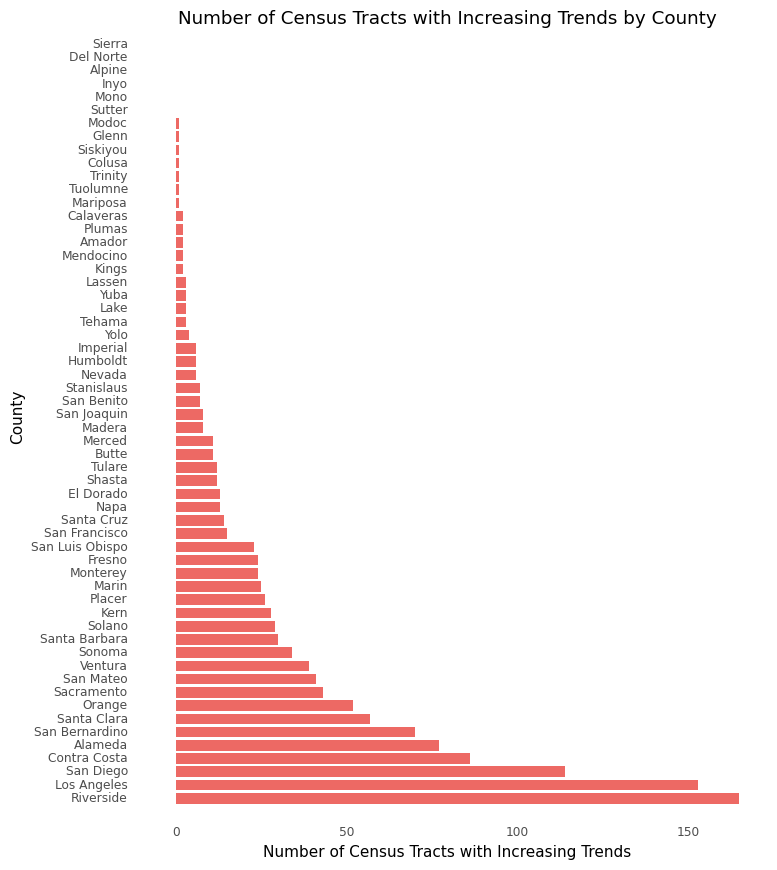

<ggplot: (326906757)>

In [8]:
ggplot(county_df, aes("reorder(county, -increasing)", "increasing")) + \
    geom_bar(stat="identity", fill=red, width = 0.8) + \
    theme_minimal() + \
    theme(figure_size=(8, 10), panel_grid = element_blank()) + \
    coord_flip() + \
    labs(x="County", y="Number of Census Tracts with Increasing Trends", title="Number of Census Tracts with Increasing Trends by County")

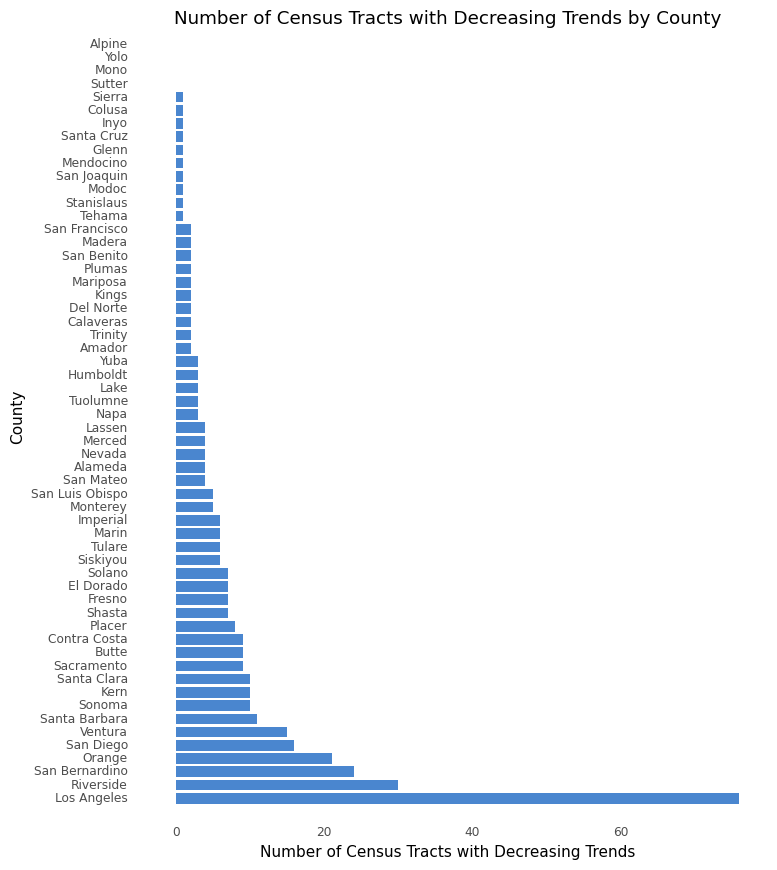

<ggplot: (327135729)>

In [9]:
ggplot(county_df, aes("reorder(county, -decreasing)", "decreasing")) + \
    geom_bar(stat="identity", fill=blue, width = 0.8) + \
    theme_minimal() + \
    theme(figure_size=(8, 10), panel_grid = element_blank()) + \
    coord_flip() + \
    labs(x="County", y="Number of Census Tracts with Decreasing Trends", title="Number of Census Tracts with Decreasing Trends by County")

In [10]:
tidy = pd.melt(county_df, id_vars=['county'], var_name='trends')

def normalize(row):
    row["value"] = row["value"] / totals[row["county"]]
    return row

tidy = tidy.apply(normalize, axis=1)
tidy["trends"] = pd.Categorical(tidy["trends"], categories=["decreasing", "no trend", "increasing"], ordered=True)

# To be honest I kinda blanked here and woke up and the code was written
for index, row in tidy.iterrows():
    sort_value = tidy[(tidy["county"] == row["county"]) & (tidy["trends"] == "increasing")].iloc[0].value
    if sort_value <= 0:
        sort_value = -tidy[(tidy["county"] == row["county"]) & (tidy["trends"] == "decreasing")].iloc[0].value
    tidy.loc[index, "sort_value"] =  sort_value
        

tidy.head()

,county,trends,value,sort_value
0,Los Angeles,increasing,0.286517,0.286517
1,Riverside,increasing,0.464789,0.464789
2,Santa Clara,increasing,0.413043,0.413043
3,Orange,increasing,0.335484,0.335484
4,San Diego,increasing,0.408602,0.408602


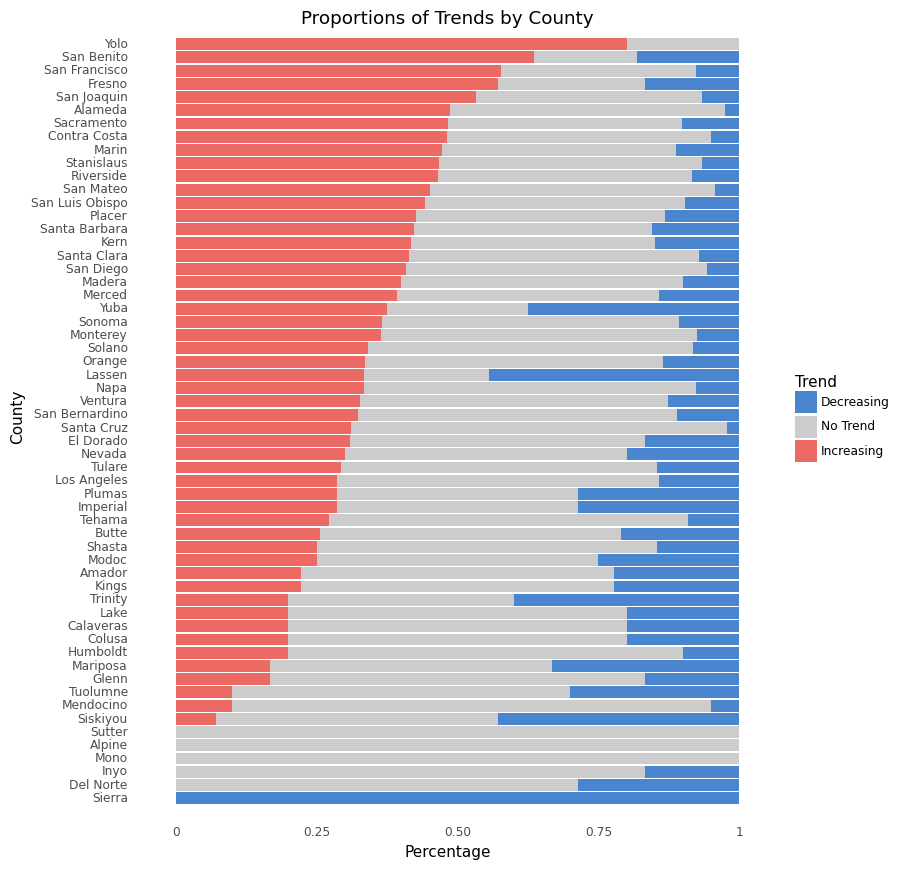

<ggplot: (369810029)>

In [11]:
ggplot(tidy, aes('reorder(county, sort_value)', 'value', fill='trends')) + \
    geom_col() + \
    theme_minimal() + \
    scale_fill_manual(values=[blue, "#cccccc", red], name="Trend", labels=["Decreasing", "No Trend", "Increasing"]) + \
    theme(figure_size=(8, 10), panel_grid = element_blank()) + \
    coord_flip() + \
    labs(x="County", y="Percentage", title="Proportions of Trends by County")